# PREDICTING CUSTOMER CHURN FOR SYRIATEL

## Overview
This project aims to develop a machine learning model to predict customer churn for SyriaTel, a telecommunications provider, using historical data such as customer demographics, usage patterns, and service plans. The goal is to identify at-risk customers and provide actionable insights for targeted retention strategies, such as personalized offers and improved customer service. By accurately predicting churn, SyriaTel can reduce acquisition costs, enhance customer loyalty, and improve profitability, ultimately strengthening its competitive position in the market.

## Business Problem
SyriaTel faces the challenge of customer churn, which leads to lost revenue and higher acquisition costs, yet lacks a data-driven approach to predict and address this issue. This project aims to develop a predictive model that accurately identifies customers at risk of churning, using historical data and key customer features such as usage patterns, demographics, service plans, and interaction history. By leveraging this model, SyriaTel can proactively reduce churn, improve retention, and optimize marketing and customer service efforts, ultimately boosting profitability, customer loyalty, and resource efficiency.


## Key Objectives:
- **Develop a Predictive Model:** Build a machine learning model that predicts which customers are likely to churn based on historical data, including customer demographics, usage patterns, service plans, and interaction history.
- **Identify Churn Drivers:** Analyze key features that influence churn, such as international plans, voicemail services, call durations, charges, and customer service interactions, to pinpoint the most significant factors affecting churn.
- **Examine Churn Distribution:** Investigate how churn varies across different customer segments, such as by state, area code, or service plan, to uncover patterns that can inform targeted retention efforts.
- **Ensure Data Quality:** Address any data quality issues, such as missing values, inconsistencies, or errors, to ensure the predictive model is built on reliable and clean data.
- **Handle Data Imbalance:** Tackle issues with class imbalance in the churn dataset using techniques like resampling or class weighting to ensure the model performs effectively on both churned and non-churned customers.
- **Provide Actionable Insights:** Deliver actionable insights for SyriaTel to implement targeted retention strategies, such as personalized offers or proactive customer service interventions, based on the model's predictions.


## Data Understanding

I import the relevant libraries to clean and explore the dataset as well as creating models from the dataset.


In [292]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib import pyplot as plt
%matplotlib inline


In [293]:
# Load the data
df = pd.read_csv('/content/SyriaTel_Customer_Churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [294]:
# Display a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset contains 3,333 rows and 21 columns, with no missing values. Additionally, it includes a variety of data types.

In [295]:
# Checking for the statistical summary on numerical columns
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [296]:
# Calculate the churn rate
churn_rate = df['churn'].value_counts(normalize=True)
print(churn_rate)


churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64


The proportion data indicates that about 14.5% of customers are churning. In comparison to other leading telecom companies, which is between 1% and 3%, SyriaTel's churn rate is relatively high.

## Data Preparation

In [297]:
# Replace spaces in columns with underscores
df.columns = df.columns.str.replace(' ', '_')



In [298]:
# Convert the 'churn' column from boolean to 0 (no churn) and 1 (churn)
df['churn'] = df['churn'].astype(int)
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


All column names were updated to replace spaces with underscores, ensuring greater consistency and ease of access for further analysis. The 'phone_number' column, which contained both the area code and the remaining digits, was modified to keep only the 'area_code' as the remaining digits were deemed irrelevant.Additionally, the 'churn' column was converted from boolean values to numeric format, with 1 indicating churn and 0 indicating no churn.

In [299]:
# Remove non-numeric characters from 'phone_number' column
df['phone_number'] = df['phone_number'].str.replace(r'\D', '', regex=True)

# Rename 'phone_number' to 'customer_id'
df.rename(columns={'phone_number': 'customer_id'}, inplace=True)

df.customer_id

,customer_id
0,3824657
1,3717191
2,3581921
3,3759999
4,3306626
...,...
3328,4144276
3329,3703271
3330,3288230
3331,3646381


Cleaned the phone_number column by removing non-numeric characters to ensure it only contains numeric digits, making the data more suitable for machine learning models that may require numerical inputs. Finally, renamed the column to customer_id to reflect its role as a unique identifier for each customer, improving clarity and consistency in the dataset.

In [300]:
# Replace yes and no to true and false
df['international_plan'] = df['international_plan'].replace({'yes': True, 'no': False})
df['voice_mail_plan'] = df['voice_mail_plan'].replace({'yes': True, 'no': False})

df[['international_plan', 'voice_mail_plan']].head()

<ipython-input-300-56449e63de33>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['international_plan'] = df['international_plan'].replace({'yes': True, 'no': False})
<ipython-input-300-56449e63de33>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['voice_mail_plan'] = df['voice_mail_plan'].replace({'yes': True, 'no': False})


,international_plan,voice_mail_plan
0,False,True
1,False,True
2,False,False
3,True,False
4,True,False


By replacing "Yes" and "No" with their respective Boolean equivalents, I simplify the data, making it more straightforward for analysis and model training.

In [301]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

state                     0
account_length            0
area_code                 0
customer_id               0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64


In [302]:
# Check for duplicates
duplicate_rows = df.duplicated().sum()
print(duplicate_rows)

0


In [303]:
# Check for null values
null_values = df.isnull().sum()
print(null_values)


state                     0
account_length            0
area_code                 0
customer_id               0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64


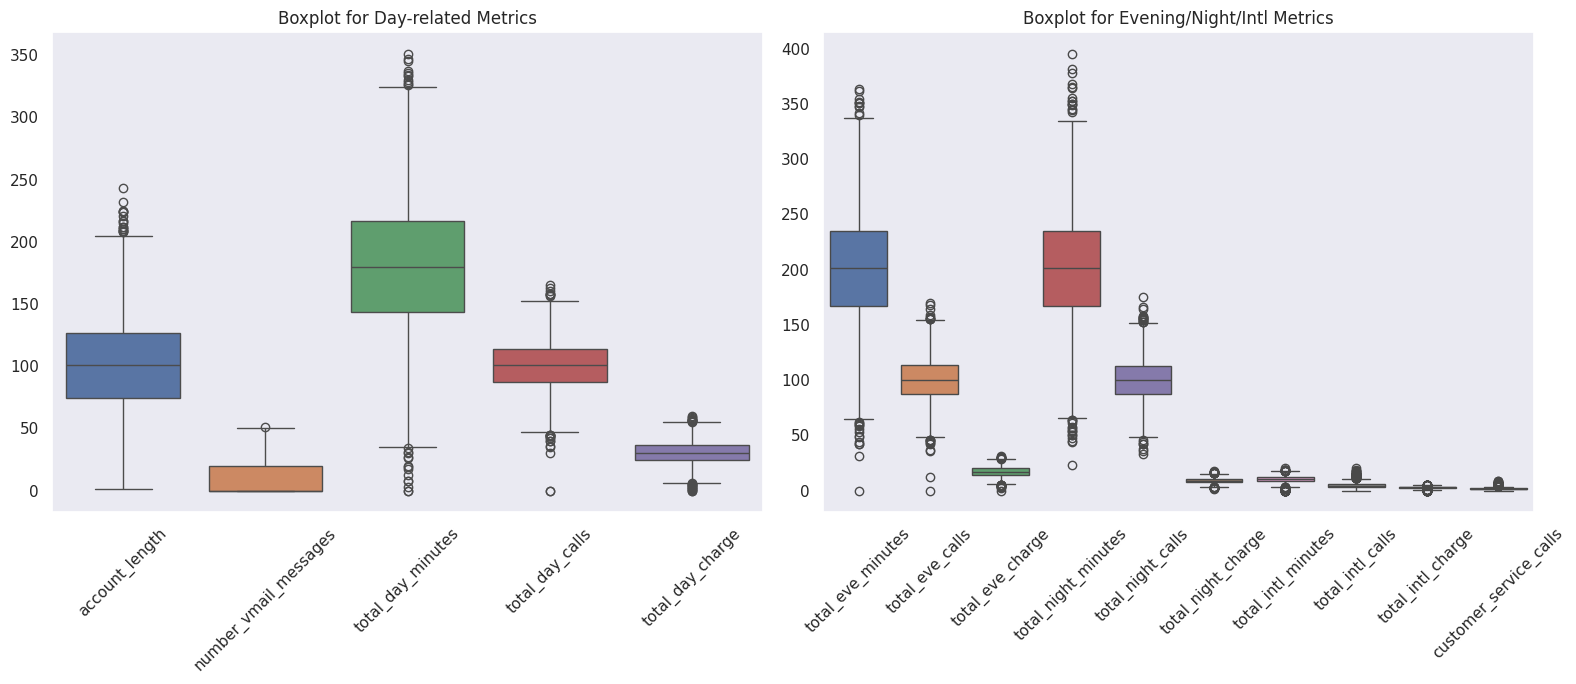

In [304]:
# Check for outliners
# Define the two groups of columns
group_1 = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge']
group_2 = ['total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
           'total_night_minutes', 'total_night_calls', 'total_night_charge',
           'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
           'customer_service_calls']

# Create a figure to display two boxplots side by side
plt.figure(figsize=(16, 7))

# Boxplot for Group 1
plt.subplot(1, 2, 1)
sns.boxplot(data=df[group_1])
plt.title('Boxplot for Day-related Metrics')
plt.xticks(rotation=45)

# Boxplot for Group 2
plt.subplot(1, 2, 2)
sns.boxplot(data=df[group_2])
plt.title('Boxplot for Evening/Night/Intl Metrics')
plt.xticks(rotation=45)

# Display the boxplots
plt.tight_layout()
plt.show()

I have decided to keep the outliers in the dataset because most of them represent valid observations that provide useful information, such as rare customer behaviors. Although these outliers are extreme values, they are still reflective of real-world scenarios that could be important for the model. Since I will be using a decision tree for modeling, I am confident that retaining the outliers will not significantly affect the model's performance. Decision trees are less sensitive to outliers compared to other algorithms, as they make splits based on feature values rather than relying on the distance between data points.

In [305]:
# Create total domestic columns (excluding international calls)
df['total_domestic_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['total_domestic_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_domestic_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

# Create separate total columns that include international calls
df['total_international_minutes'] = df['total_intl_minutes']
df['total_international_calls'] = df['total_intl_calls']
df['total_international_charge'] = df['total_intl_charge']

# Calculate charge per minute (total charge divided by total minutes)
df['charge_per_minute'] = (df['total_domestic_charge'] + df['total_international_charge']) / (df['total_domestic_minutes'] + df['total_international_minutes'])

# Calculate proportion of international calls relative to total calls
df['intl_call_proportion'] = df['total_international_calls'] / (df['total_domestic_calls'] + df['total_international_calls'])

# Create customer call satisfaction column
df['customer_call_satisfaction'] = df['customer_service_calls'] / (df['total_domestic_calls'] + df['total_international_calls'])

# Display the updated DataFrame to confirm the changes
print(df[['total_domestic_minutes', 'total_domestic_calls', 'total_domestic_charge',
          'total_international_minutes', 'total_international_calls', 'total_international_charge',
          'charge_per_minute', 'intl_call_proportion', 'customer_call_satisfaction']].head())

   total_domestic_minutes  total_domestic_calls  total_domestic_charge  \
0                   707.2                   300                  72.86   
1                   611.5                   329                  55.54   
2                   527.2                   328                  59.00   
3                   558.2                   248                  65.02   
4                   501.9                   356                  49.36   

   total_international_minutes  total_international_calls  \
0                         10.0                          3   
1                         13.7                          3   
2                         12.2                          5   
3                          6.6                          7   
4                         10.1                          3   

   total_international_charge  charge_per_minute  intl_call_proportion  \
0                        2.70           0.105354              0.009901   
1                        3.70           

The dataset was enhanced by creating several new features to provide deeper insights into customer behavior. First, total domestic columns were created by summing the respective day, evening, and night minutes, calls, and charges, excluding international calls. Separate columns for international minutes, calls, and charges were also retained for clarity. A charge per minute metric was then calculated by dividing the combined domestic and international charges by the total minutes. The proportion of international calls relative to total calls was derived by dividing international calls by the sum of domestic and international calls. Finally, a customer call satisfaction ratio was created by calculating the number of customer service calls relative to total calls, highlighting customers who may have frequent service interactions, which could indicate potential dissatisfaction and higher churn risk. These new features enhance the dataset and provide useful indicators for churn prediction

In [306]:
# Create a dictionary for mapping states to regions
state_to_region = {
    "CT": "Northeast", "ME": "Northeast", "MA": "Northeast", "NH": "Northeast", "NJ": "Northeast",
    "NY": "Northeast", "PA": "Northeast", "RI": "Northeast", "VT": "Northeast",

    "IL": "Midwest", "IN": "Midwest", "IA": "Midwest", "KS": "Midwest", "KY": "Midwest",
    "MI": "Midwest", "MN": "Midwest", "MO": "Midwest", "NE": "Midwest", "ND": "Midwest",
    "OH": "Midwest", "SD": "Midwest", "WI": "Midwest",

    "AL": "South", "AR": "South", "DE": "South", "FL": "South", "GA": "South", "LA": "South",
    "MD": "South", "MS": "South", "NC": "South", "OK": "South", "SC": "South", "TN": "South",
    "TX": "South", "VA": "South", "WV": "South",

    "AK": "West", "AZ": "West", "CA": "West", "CO": "West", "HI": "West", "ID": "West",
    "MT": "West", "NV": "West", "NM": "West", "OR": "West", "UT": "West", "WA": "West",
    "WY": "West"
}

# Create a new column for regions
df["region"] = df["state"].map(state_to_region)

df.head()


,state,account_length,area_code,customer_id,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_domestic_minutes,total_domestic_calls,total_domestic_charge,total_international_minutes,total_international_calls,total_international_charge,charge_per_minute,intl_call_proportion,customer_call_satisfaction,region
0,KS,128,415,3824657,False,True,25,265.1,110,45.07,...,707.2,300,72.86,10.0,3,2.70,0.105354,0.009901,0.003300,Midwest
1,OH,107,415,3717191,False,True,26,161.6,123,27.47,...,611.5,329,55.54,13.7,3,3.70,0.094754,0.009036,0.003012,Midwest
2,NJ,137,415,3581921,False,False,0,243.4,114,41.38,...,527.2,328,59.00,12.2,5,3.29,0.115480,0.015015,0.000000,Northeast
3,OH,84,408,3759999,True,False,0,299.4,71,50.90,...,558.2,248,65.02,6.6,7,1.78,0.118272,0.027451,0.007843,Midwest
4,OK,75,415,3306626,True,False,0,166.7,113,28.34,...,501.9,356,49.36,10.1,3,2.73,0.101738,0.008357,0.008357,South


Dividing states into regions helps me capture regional behavior patterns, as people in different areas, like the Northeast or South, often have distinct churn tendencies. It simplifies the model by reducing complexity, making it easier to interpret and potentially improving performance by avoiding overfitting, especially in states with fewer customers. Grouping states allows me to capture broader trends, like economic conditions or service differences, that can affect churn. When combined with other features, regional data can uncover insights specific to certain areas, improving the model’s predictive power.


In [307]:
# Save the cleaned dataset as a CSV file
df.to_csv('SyriaTel_Customer_Churn_cleaned.csv', index=False)

## Exploratory Data Analysis

During EDA, the analysis can be divided into univariate, bivariate, and multivariate analysis.

**Univariate Analysis**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

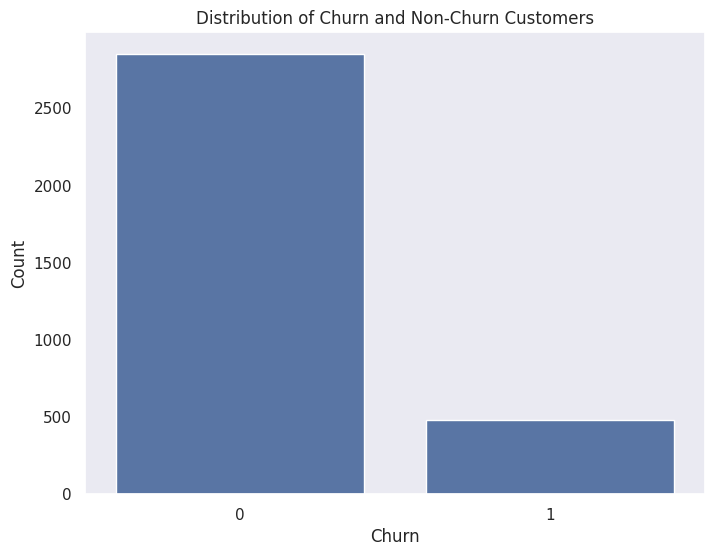

In [308]:
# Understand the distribution of churn and non-churn customers
# Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn and Non-Churn Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt

It provides valuable insight into data imbalance that could significantly affect the performance of predictive models.

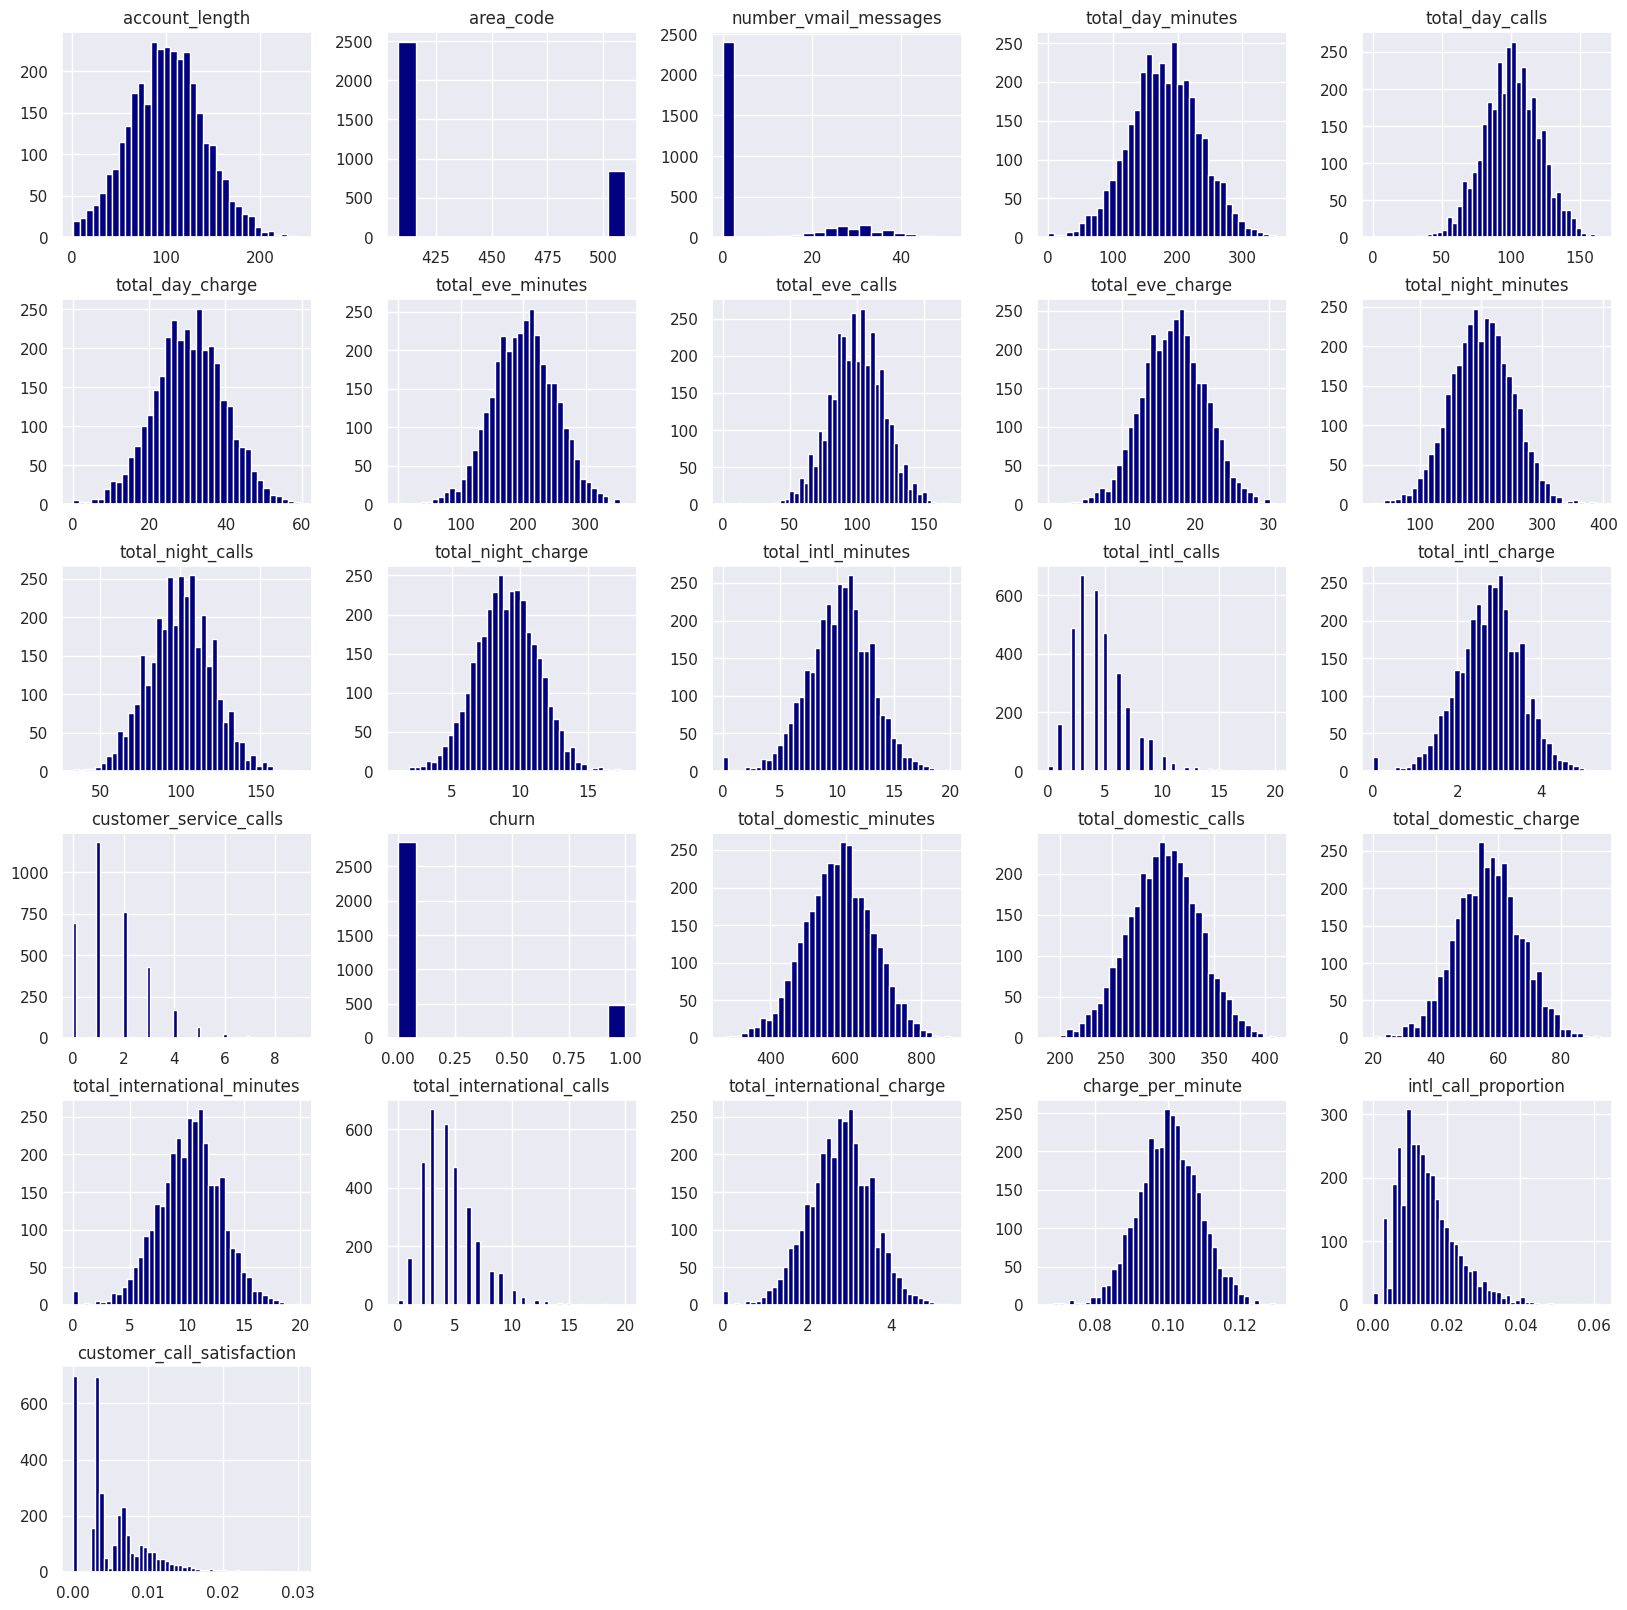

In [309]:
# Set plot style
sns.set(style='dark')

# Plot histograms for all columns
df.hist(bins='auto', figsize=(20, 20), color='navy')

# Display the plot
plt.show()

Generating histograms for all  features in the dataset. Histograms are a useful tool for visualizing the distribution of data, as they show the frequency of values within specific ranges or bins. This helps in understanding the shape, spread, and central tendency of the data.

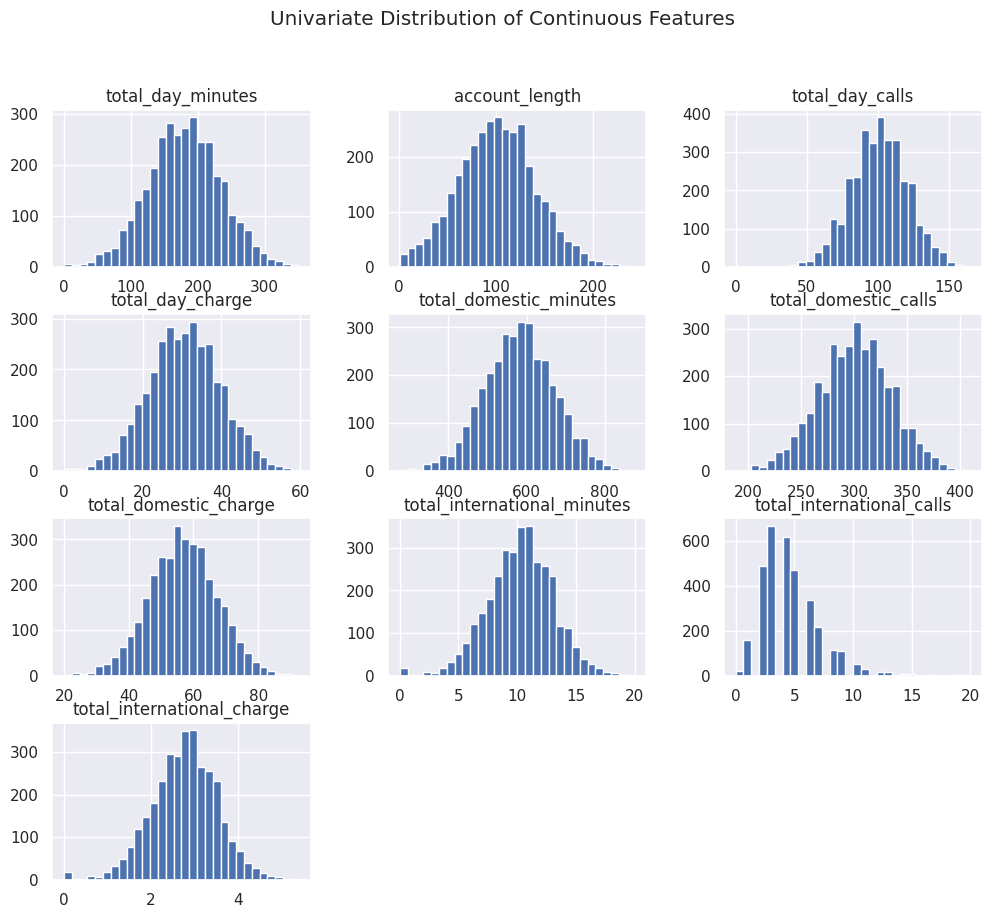

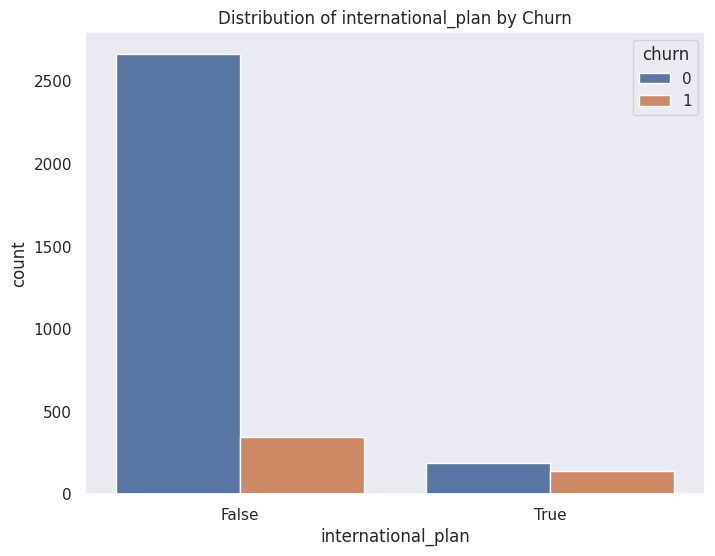

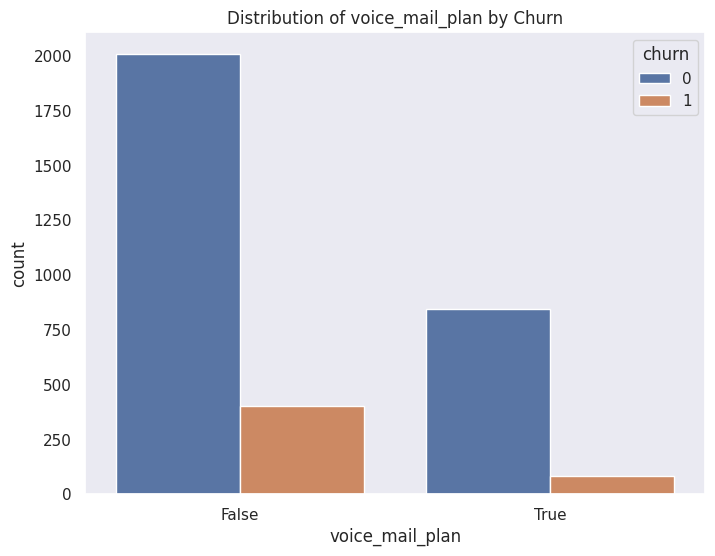

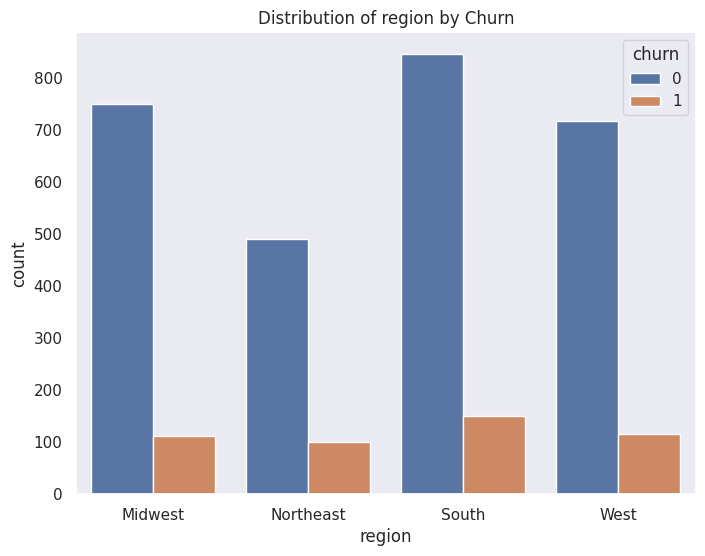

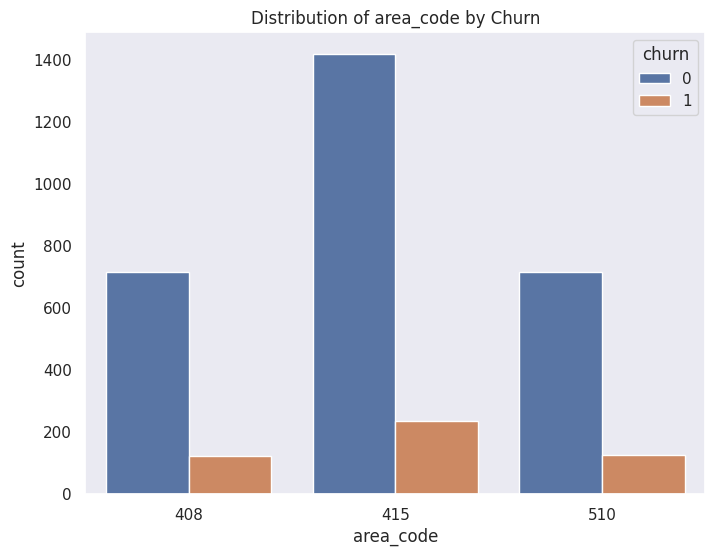

In [310]:
# Visualizing the distribution of continuous features
continuous_features = ['total_day_minutes', 'account_length', 'total_day_calls', 'total_day_charge',
                       'total_domestic_minutes', 'total_domestic_calls', 'total_domestic_charge',
                       'total_international_minutes', 'total_international_calls', 'total_international_charge']

# Plot histograms for continuous variables
df[continuous_features].hist(figsize=(12, 10), bins=30)
plt.suptitle('Univariate Distribution of Continuous Features')
plt.show()

# Visualizing categorical features
categorical_features = ['international_plan', 'voice_mail_plan', 'region', 'area_code']

# Count plot for categorical variables
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature, hue='churn')
    plt.title(f'Distribution of {feature} by Churn')
    plt.show()


The visualizations provide insights into the distributions of both continuous and categorical features by churn status. The histograms of continuous variables like total_day_minutes, account_length, and total_international_charge show normal-like distributions, with no significant skewness. The bar plots for categorical variables highlight patterns: customers with an international plan are more likely to churn, while those with a voice mail plan are less likely to churn. The region plot shows churn distribution across regions is relatively uniform, with slight variations, while area_code displays no evident correlation with churn. These insights help identify key predictors like international_plan for churn modeling, while others like area_code may hold less predictive value.

**Bivariate Analysis**

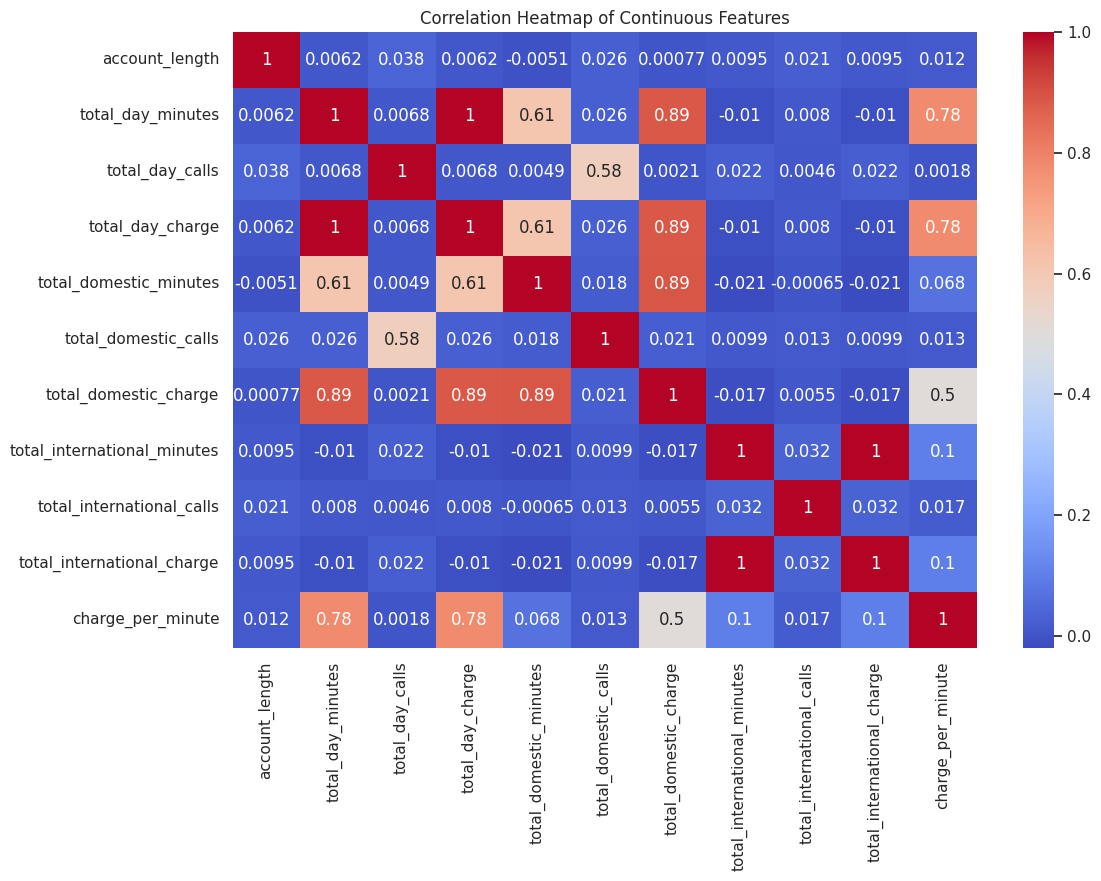

In [311]:
# Correlation heatmap for continuous variables
plt.figure(figsize=(12, 8))
continuous_features = ['account_length', 'total_day_minutes', 'total_day_calls', 'total_day_charge',
                       'total_domestic_minutes', 'total_domestic_calls', 'total_domestic_charge',
                       'total_international_minutes', 'total_international_calls', 'total_international_charge',
                       'charge_per_minute']
correlation_matrix = df[continuous_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Continuous Features")
plt.show()


This cell generates a correlation heatmap to visualize the relationships among continuous features in the dataset. It calculates the correlation matrix using df.corr() and displays it with a Seaborn heatmap, where each cell represents the correlation coefficient between two features. High correlations, such as between total_day_minutes and total_day_charge (1.0), indicate redundancy, while near-zero values suggest minimal relationships. This visualization helps identify dependencies and guide feature selection for modeling.

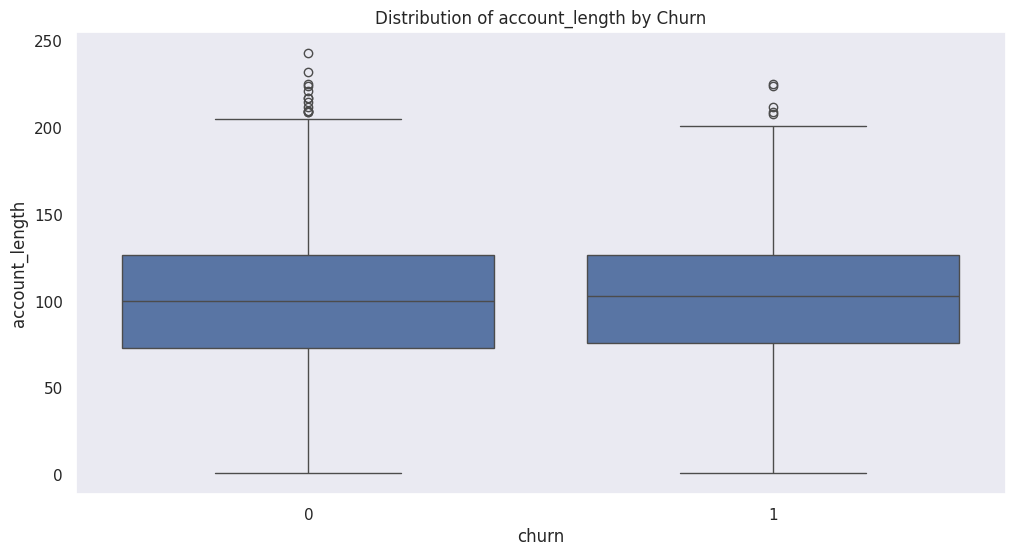

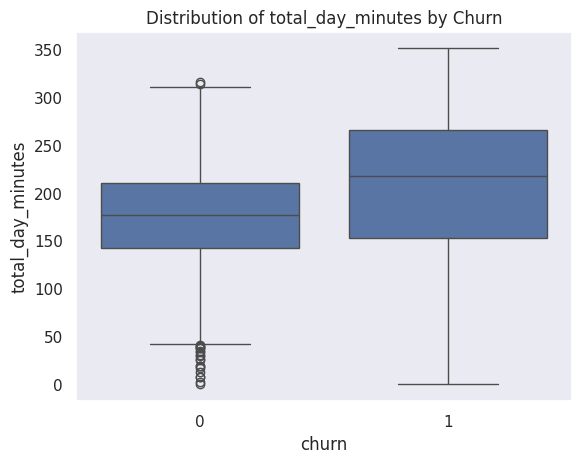

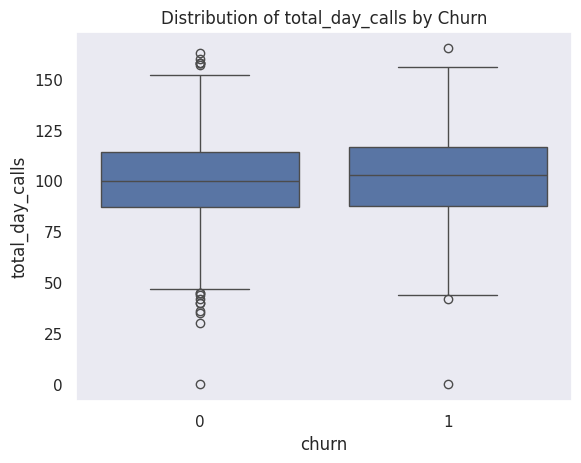

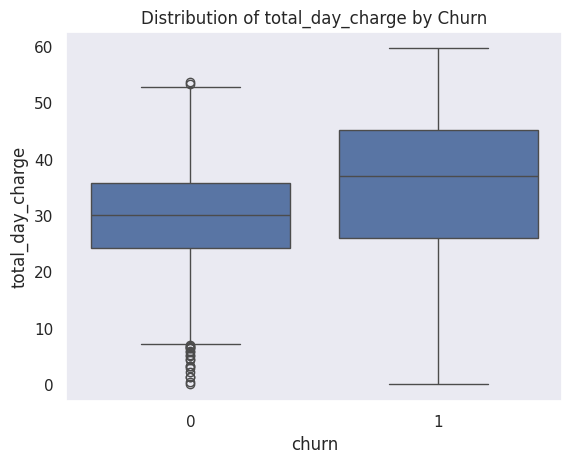

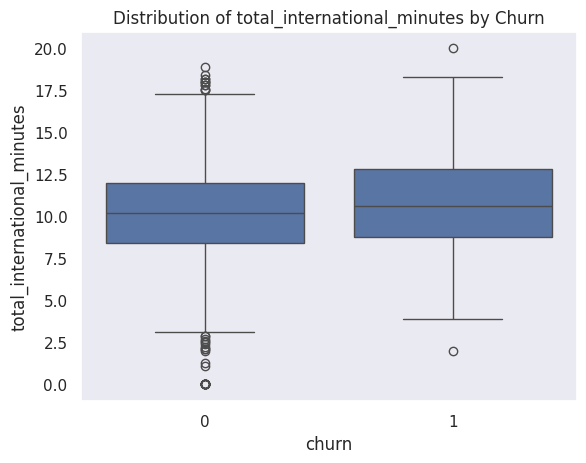

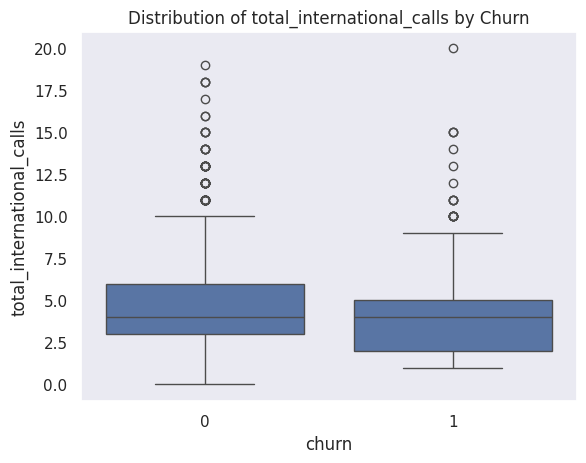

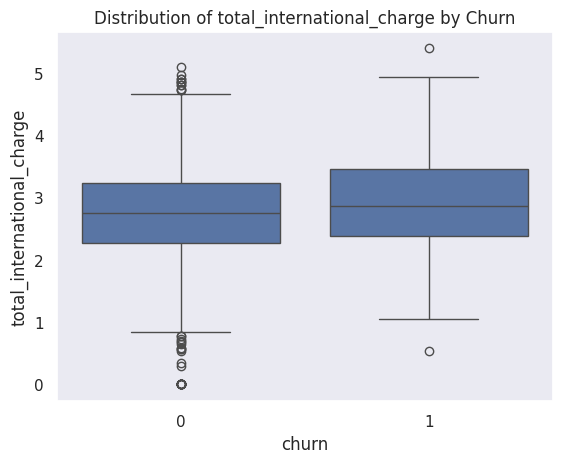

In [312]:
# Boxplots for numerical variables grouped by churn
plt.figure(figsize=(12, 6))
numerical_features = ['account_length', 'total_day_minutes', 'total_day_calls', 'total_day_charge',
                      'total_international_minutes', 'total_international_calls', 'total_international_charge']
for feature in numerical_features:
    sns.boxplot(x='churn', y=feature, data=df)
    plt.title(f"Distribution of {feature} by Churn")
    plt.show()

The boxplots visualize the distributions of numerical features grouped by churn status (0: non-churn, 1: churn), revealing key insights. Features like total_day_minutes and total_day_charge show higher medians for churners, indicating their strong association with churn, while account_length and total_day_calls display nearly identical distributions between churners and non-churners, suggesting minimal impact. Similarly, total_international_calls and total_international_minutes have overlapping distributions, showing a weaker relationship with churn. These boxplots help identify which features are more relevant for churn prediction, emphasizing the importance of usage metrics like total_day_minutes and total_day_charge.

**Multivariate Analysis**

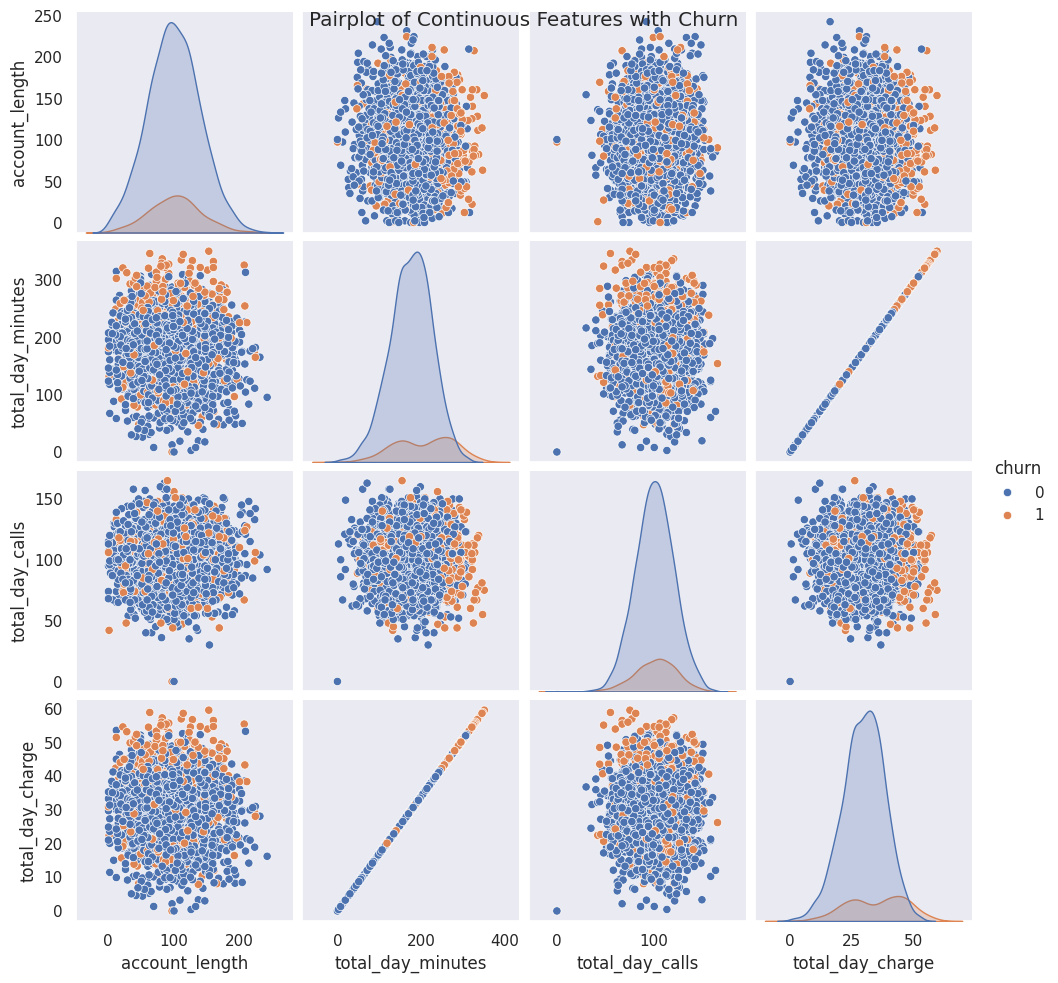

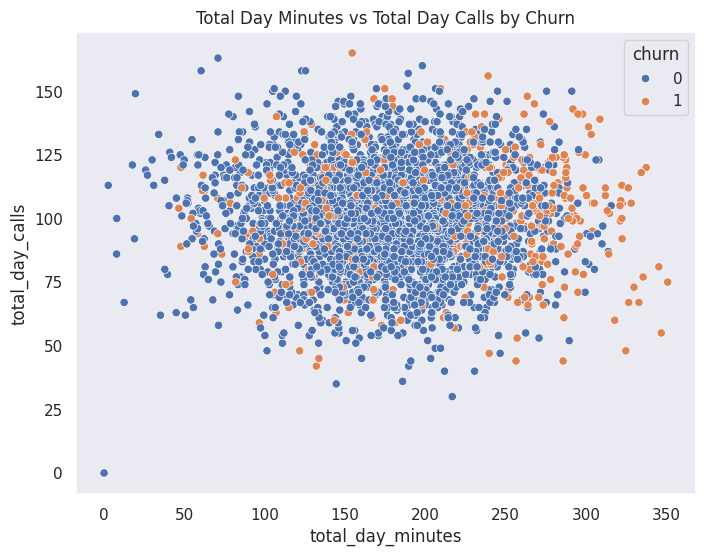

Chi-Square Test for international_plan vs Churn: p-value = 2.4931077033159556e-50
Chi-Square Test for voice_mail_plan vs Churn: p-value = 5.15063965903898e-09
Chi-Square Test for state vs Churn: p-value = 0.002296221552011188
Chi-Square Test for area_code vs Churn: p-value = 0.9150556960243712


In [313]:
# Pairplot for visualizing relationships between multiple variables
sns.pairplot(df[['account_length', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'churn']], hue='churn')
plt.suptitle('Pairplot of Continuous Features with Churn')
plt.show()

# Scatter plot to examine relationships between two continuous variables and churn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_day_minutes', y='total_day_calls', hue='churn', data=df)
plt.title('Total Day Minutes vs Total Day Calls by Churn')
plt.show()

# Heatmap showing correlation between continuous features and churn (using Chi-Square)
# Use Chi-Square test for categorical variables
from scipy.stats import chi2_contingency

# Encode categorical features to numeric values
le = LabelEncoder()
df_encoded = df.copy()
df_encoded['churn'] = le.fit_transform(df_encoded['churn'])
df_encoded['international_plan'] = le.fit_transform(df_encoded['international_plan'])
df_encoded['voice_mail_plan'] = le.fit_transform(df_encoded['voice_mail_plan'])
df_encoded['state'] = le.fit_transform(df_encoded['state'])
df_encoded['area_code'] = le.fit_transform(df_encoded['area_code'])

# Chi-square test for categorical vs churn
categorical_features = ['international_plan', 'voice_mail_plan', 'state', 'area_code']
for feature in categorical_features:
    contingency_table = pd.crosstab(df_encoded[feature], df_encoded['churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {feature} vs Churn: p-value = {p}")


This cell performs multivariate analysis to investigate relationships between features and churn. First, a pairplot visualizes the pairwise relationships among continuous variables (e.g., account_length, total_day_minutes, total_day_calls, total_day_charge) colored by churn, revealing potential patterns or clusters. A scatter plot is used to explore the relationship between total_day_minutes and total_day_calls, highlighting churn differences visually. To analyze the relationship between categorical features and churn, the Chi-Square test is performed on categorical features (international_plan, voice_mail_plan, state, area_code). The test calculates the statistical significance of the association between each categorical variable and churn, outputting p-values. The results show significant associations between international_plan (p-value ≈ 2.49e-50), voice_mail_plan (p-value ≈ 5.15e-09), and state (p-value ≈ 0.002) with churn, suggesting that these features are important predictors. However, area_code (p-value ≈ 0.915) does not exhibit a significant relationship with churn, indicating its limited predictive power. These insights guide feature selection and model optimization.

## Modelling

**Label Encoding and Data Splitting**

In [314]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'region']

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Define features and target
X = df.drop(columns=['churn'])  # Features
y = df['churn']  # Target

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



**Baseline decision tree**

Baseline Decision Tree Performance:
Precision: 0.75
Recall: 0.80
F1 Score: 0.77
AUC-ROC: 0.88
Confusion Matrix:
[[816  39]
 [ 29 116]]


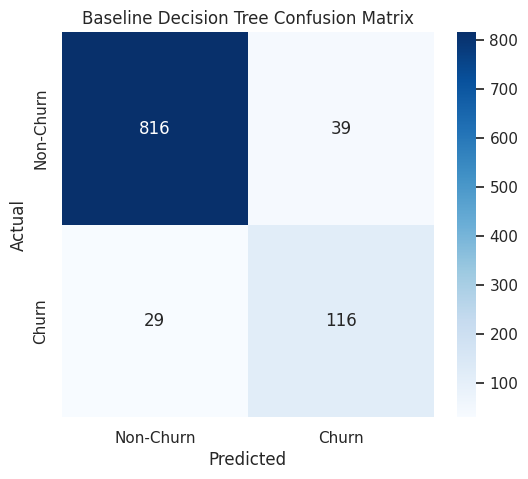

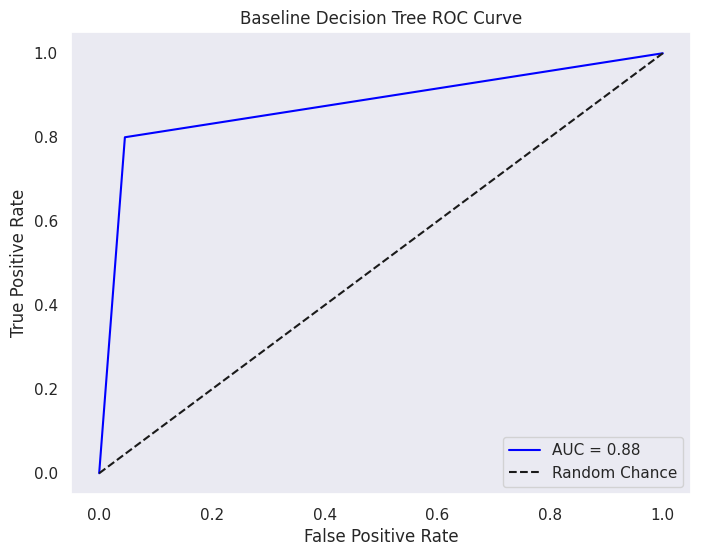

In [315]:
# Initialize the baseline Decision Tree model
baseline_tree = DecisionTreeClassifier(random_state=42)

# Train the model
baseline_tree.fit(X_train, y_train)

# Make predictions
y_pred_baseline = baseline_tree.predict(X_test)
y_prob_baseline = baseline_tree.predict_proba(X_test)[:, 1]

# Evaluate the baseline model
precision_baseline = precision_score(y_test, y_pred_baseline)
recall_baseline = recall_score(y_test, y_pred_baseline)
f1_baseline = f1_score(y_test, y_pred_baseline)
auc_baseline = roc_auc_score(y_test, y_prob_baseline)

# Print metrics
print("Baseline Decision Tree Performance:")
print(f"Precision: {precision_baseline:.2f}")
print(f"Recall: {recall_baseline:.2f}")
print(f"F1 Score: {f1_baseline:.2f}")
print(f"AUC-ROC: {auc_baseline:.2f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_baseline))

# Plot Confusion Matrix
conf_matrix_baseline = confusion_matrix(y_test, y_pred_baseline)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_baseline, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title("Baseline Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC Curve
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_prob_baseline)
roc_auc_baseline = auc(fpr_baseline, tpr_baseline)
plt.figure(figsize=(8, 6))
plt.plot(fpr_baseline, tpr_baseline, color='blue', label=f'AUC = {roc_auc_baseline:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title("Baseline Decision Tree ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


The baseline decision tree model was trained on the dataset without addressing any class imbalance or hyperparameter tuning. The evaluation metrics indicate a precision of 0.75, recall of 0.80, F1-score of 0.77, and an AUC-ROC of 0.88, which suggests that the model performs well in identifying customers likely to churn, balancing between false positives and false negatives. The confusion matrix reveals that the model correctly predicted 816 non-churn cases and 116 churn cases, while misclassifying 39 non-churn as churn (false positives) and 29 churn cases as non-churn (false negatives). The ROC curve further demonstrates a good separation between churn and non-churn classes, with the AUC-ROC value reflecting strong model discrimination ability. Overall, the baseline decision tree serves as a solid starting point, but further tuning is required to improve its performance, especially in minimizing false positives and negatives.

**Tuned Decision Tree Addressing Class Imbalance**

Tuned Decision Tree with SMOTE Performance:
Precision: 0.50
Recall: 0.77
F1 Score: 0.61
AUC-ROC: 0.82
Confusion Matrix:
[[746 109]
 [ 34 111]]


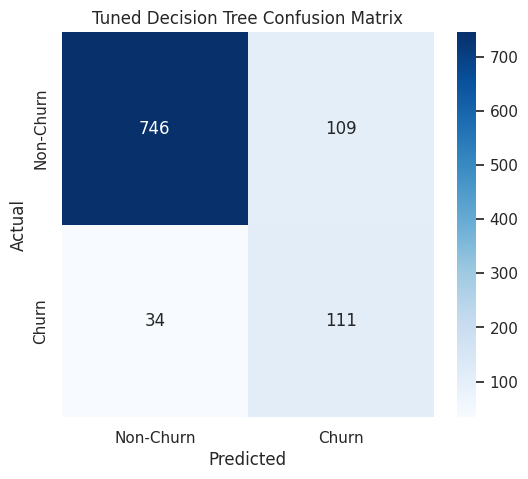

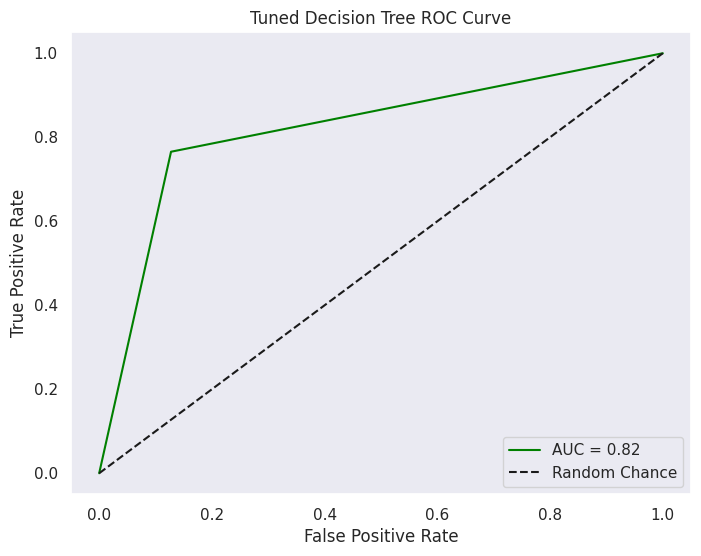

In [316]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

# Initialize the Decision Tree model
tuned_tree = DecisionTreeClassifier(random_state=42)

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(tuned_tree, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_tuned_tree = grid_search.best_estimator_

# Make predictions
y_pred_tuned = best_tuned_tree.predict(X_test)
y_prob_tuned = best_tuned_tree.predict_proba(X_test)[:, 1]

# Evaluate the tuned model
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
auc_tuned = roc_auc_score(y_test, y_prob_tuned)

# Print metrics and confusion matrix
print("Tuned Decision Tree with SMOTE Performance:")
print(f"Precision: {precision_tuned:.2f}")
print(f"Recall: {recall_tuned:.2f}")
print(f"F1 Score: {f1_tuned:.2f}")
print(f"AUC-ROC: {auc_tuned:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))

# Plot Confusion Matrix
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title("Tuned Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC Curve
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, color='green', label=f'AUC = {roc_auc_tuned:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title("Tuned Decision Tree ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()



The tuned Decision Tree model addresses class imbalance using SMOTE (Synthetic Minority Oversampling Technique) to balance the distribution of churn and non-churn instances in the training set. A GridSearchCV approach was applied to optimize hyperparameters such as max_depth, min_samples_split, min_samples_leaf, and class_weight, with the F1-score as the scoring metric. The model achieved a precision of 50%, meaning half of the churn predictions were correct, and a recall of 77%, indicating the model identified 77% of the actual churn cases. The F1-score of 61% reflects a moderate balance between precision and recall, and the AUC-ROC score of 0.82 shows reasonable discriminatory power between churn and non-churn cases. The confusion matrix highlights 746 correctly predicted non-churn cases and 111 correctly identified churn cases, with some misclassifications. Overall, while the model captures churn effectively, further tuning or alternative approaches may improve precision and overall performance.

**Further Tuned Decision Tree**

Further Tuned Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       855
           1       0.94      0.79      0.86       145

    accuracy                           0.96      1000
   macro avg       0.95      0.89      0.92      1000
weighted avg       0.96      0.96      0.96      1000

Precision: 0.94
Recall: 0.79
F1-Score: 0.86
AUC-ROC: 0.88


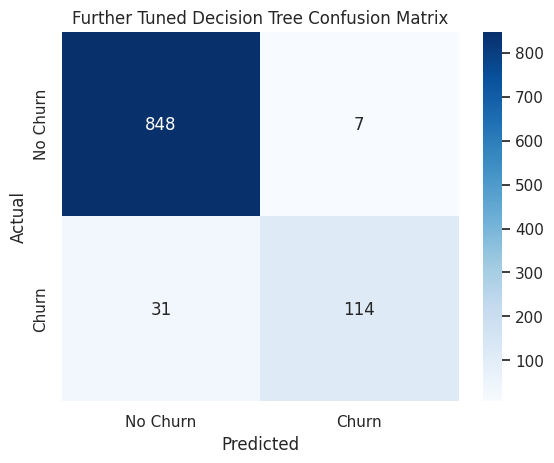

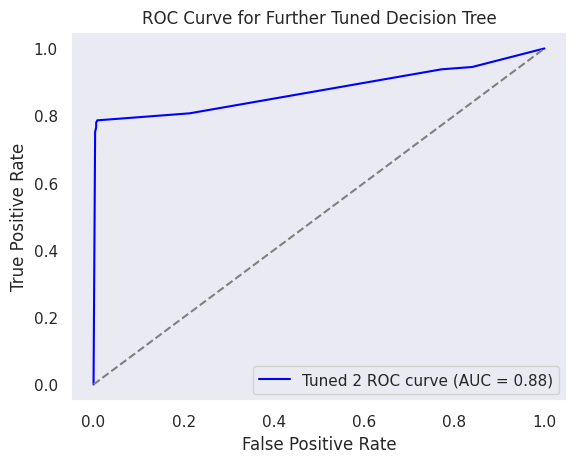

In [317]:
# Expanded hyperparameter grid for further tuning
param_grid_2 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

# Create a Decision Tree model
dtree_2 = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV for hyperparameter tuning with F1-score
grid_search_2 = GridSearchCV(dtree_2, param_grid_2, cv=10, scoring='f1', n_jobs=-1)
grid_search_2.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_dtree_2 = grid_search_2.best_estimator_

# Make predictions with the tuned model
y_pred_tuned_2 = best_dtree_2.predict(X_test)

# Evaluate the model
precision_tuned_2 = precision_score(y_test, y_pred_tuned_2)
recall_tuned_2 = recall_score(y_test, y_pred_tuned_2)
f1_tuned_2 = f1_score(y_test, y_pred_tuned_2)
auc_roc_tuned_2 = roc_auc_score(y_test, best_dtree_2.predict_proba(X_test)[:, 1])

# Print classification report
print("Further Tuned Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tuned_2))

# Print specific metrics
print(f"Precision: {precision_tuned_2:.2f}")
print(f"Recall: {recall_tuned_2:.2f}")
print(f"F1-Score: {f1_tuned_2:.2f}")
print(f"AUC-ROC: {auc_roc_tuned_2:.2f}")

# Confusion Matrix
conf_matrix_tuned_2 = confusion_matrix(y_test, y_pred_tuned_2)
sns.heatmap(conf_matrix_tuned_2, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Further Tuned Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve for the further tuned model
fpr_tuned_2, tpr_tuned_2, _ = roc_curve(y_test, best_dtree_2.predict_proba(X_test)[:, 1])
plt.plot(fpr_tuned_2, tpr_tuned_2, color='blue', label=f'Tuned 2 ROC curve (AUC = {auc_roc_tuned_2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Further Tuned Decision Tree')
plt.legend(loc="lower right")
plt.show()

The further tuned Decision Tree model improves predictive performance by using an expanded hyperparameter grid that includes parameters like criterion, max_depth, min_samples_split, min_samples_leaf, and ccp_alpha to enhance both accuracy and generalizability. The model was trained and evaluated using 10-fold cross-validation, optimizing for the F1-score. The results demonstrate strong performance, with a precision of 94%, indicating that most of the predicted churners were actual churners, and a recall of 79%, showing that the model successfully identified a significant proportion of actual churners. The F1-score of 86% reflects a good balance between precision and recall. The AUC-ROC score of 0.88 highlights the model's strong ability to distinguish between churn and non-churn classes. The confusion matrix shows that the model correctly classified 848 non-churn customers and 114 churn customers, with minimal misclassifications. These results indicate that the tuning process significantly improved the model's performance, making it a reliable tool for predicting customer churn and aiding retention strategies.






